# Thermochemical Cycle Optimization for High-Temperature Heat Storage

This notebook simulates and analyzes a thermochemical heat storage cycle using a high-temperature material (e.g., metal oxide).  

We will:
1. Define thermodynamic parameters for the thermochemical reaction.
2. Calculate equilibrium pressure vs temperature using the van’t Hoff relation.
3. Calculate energy density for a given mass of material.
4. Visualize equilibrium conditions and energy storage potential.
5. Estimate equilibrium temperature at selected system pressures.
6. Interpret results for practical industrial heat storage applications.


In [3]:
# Defining Reaction Parameters
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Thermochemical reaction example ----------------
# Reaction: Metal oxide <-> Reduced oxide + Oxygen
delta_H = 250e3  # J/mol, reaction enthalpy
delta_S = 300    # J/mol.K, reaction entropy
R = 8.314        # J/mol.K

# Temperature range for analysis
T = np.linspace(600, 1200, 200)  # Kelvin


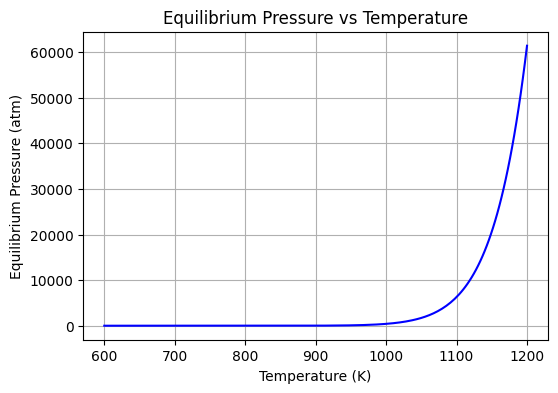

In [2]:
# Equilibrium Pressure vs Temperature
# Van't Hoff relation: P_eq = exp(ΔS/R - ΔH/(R*T))
P_eq = np.exp((delta_S / R) - (delta_H / (R * T)))

# Plot equilibrium pressure curve
plt.figure(figsize=(6,4))
plt.plot(T, P_eq, color='blue')
plt.xlabel("Temperature (K)")
plt.ylabel("Equilibrium Pressure (atm)")
plt.title("Equilibrium Pressure vs Temperature")
plt.grid(True)
plt.show()


Energy stored in 40 kg material: 100.00 MJ


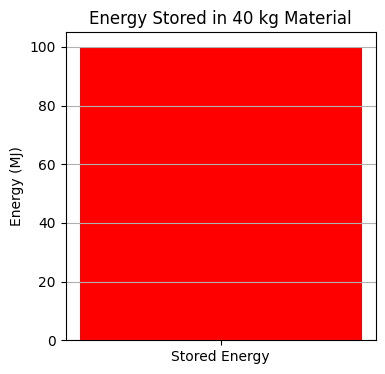

In [4]:
# Energy Density Calculation
# Calculate energy stored for a given mass
mass_material = 40  # kg
molar_mass = 100    # g/mol, example
moles_material = mass_material * 1000 / molar_mass
energy_stored = moles_material * delta_H  # J

# Display energy stored in MJ
print(f"Energy stored in {mass_material} kg material: {energy_stored/1e6:.2f} MJ")

# Optional bar chart
plt.figure(figsize=(4,4))
plt.bar(['Stored Energy'], [energy_stored/1e6], color='red')
plt.ylabel("Energy (MJ)")
plt.title(f"Energy Stored in {mass_material} kg Material")
plt.grid(axis='y')
plt.show()


In [5]:
# Equilibrium Temperature at Selected Pressures
# Calculate equilibrium temperature for set pressures
pressures_to_check = [1, 5, 10]  # atm
T_eq_for_P = delta_H / (delta_S - R * np.log(pressures_to_check))

for p, t_eq in zip(pressures_to_check, T_eq_for_P):
    print(f"Equilibrium temperature at P={p} atm: {t_eq:.1f} K")


Equilibrium temperature at P=1 atm: 833.3 K
Equilibrium temperature at P=5 atm: 872.2 K
Equilibrium temperature at P=10 atm: 890.1 K


## Interpretation & Practical Notes

- The equilibrium pressure curve shows at which temperatures the thermochemical reaction will proceed at a given pressure.  
- By adjusting system pressure, the output temperature can be tuned for specific industrial processes.  
- The energy stored in a relatively small mass (e.g., 40 kg) is significant, demonstrating the high energy density advantage of thermochemical materials over conventional phase change materials.  
- This simulation allows preliminary design optimization for industrial heat storage cycles and can guide experimental studies.  

**Next steps for real applications:**  
1. Include multiple reaction steps and real material data.  
2. Couple with heat exchanger or reactor models to simulate charging/discharging cycles.  
3. Optimize cycle efficiency under realistic operating pressures and temperatures.


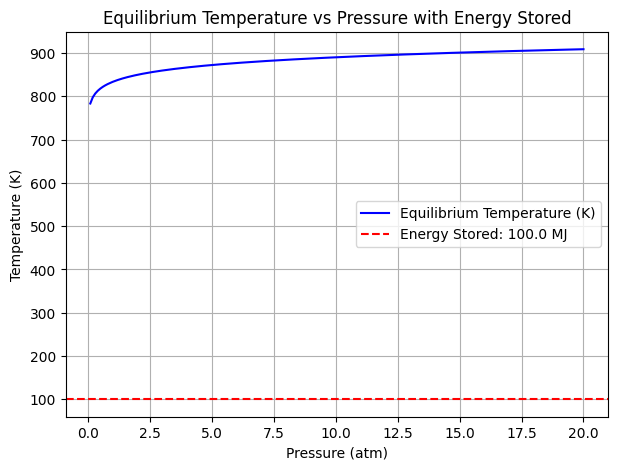

In [6]:
# Energy Stored vs Equilibrium Pressure
# Compute energy stored vs equilibrium pressure (for the same mass)
P_range = np.linspace(0.1, 20, 200)  # atm
T_eq = delta_H / (delta_S - R * np.log(P_range))
energy_MJ = moles_material * delta_H / 1e6  # same energy stored, shown as constant

plt.figure(figsize=(7,5))
plt.plot(P_range, T_eq, label="Equilibrium Temperature (K)", color='blue')
plt.axhline(y=energy_MJ, color='red', linestyle='--', label=f'Energy Stored: {energy_MJ:.1f} MJ')
plt.xlabel("Pressure (atm)")
plt.ylabel("Temperature (K)")
plt.title("Equilibrium Temperature vs Pressure with Energy Stored")
plt.legend()
plt.grid(True)
plt.show()
